# This script contains the following:

- Import data and libraries
- Data wrangling
- Data cleaning
- Plotting a choropleth





## 1. Import data and libraries

In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Import ".json" file for the U.S. 

country_geo = r'C:\Users\Asus\Exercise 6.3\02 - Data\datajson'

In [8]:
# Set path
path = r'C:\Users\asus\Human Trafficking Project Achievement 6'

In [9]:
# import dataframe

df = pd.read_csv(os.path.join(path, '02 Data', '02 Cleaned Data', 'FBI files CLEANED.csv'), index_col = False)

In [11]:
# Checking at the JSON file contents:

f = open(r'C:\Users\Asus\Exercise 6.3\02 - Data\datajson',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

## 02. Data Wrangling

In [10]:
df.head()

,DATA_YEAR,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,COUNTY_NAME,REGION_NAME,POPULATION_GROUP_CODE,POPULATION_GROUP_DESC,HUMAN_TRAFFICKING,OFFENSE_SUBCAT_NAME,ACTUAL_COUNT
0,2013,County,MO,Missouri,ST LOUIS,Midwest,9A,"MSA counties 100,000 or over",1,Commercial Sex Acts,6
1,2013,County,OH,Ohio,ALLEN,Midwest,9C,"MSA counties from 10,000 thru 24,999",1,Commercial Sex Acts,1
2,2013,County,OH,Ohio,ALLEN,Midwest,9C,"MSA counties from 10,000 thru 24,999",1,Involuntary Servitude,1
3,2013,City,TN,Tennessee,"HAMBLEN, JEFFERSON",South,4,"Cities from 25,000 thru 49,999",1,Commercial Sex Acts,1
4,2013,City,TN,Tennessee,SHELBY,South,1B,"Cities from 500,000 thru 999,999",1,Commercial Sex Acts,3


In [12]:
df.shape

(3894, 11)

In [13]:
df.columns

Index(['DATA_YEAR', 'AGENCY_TYPE_NAME', 'STATE_ABBR', 'STATE_NAME',
       'COUNTY_NAME', 'REGION_NAME', 'POPULATION_GROUP_CODE',
       'POPULATION_GROUP_DESC', 'HUMAN_TRAFFICKING', 'OFFENSE_SUBCAT_NAME',
       'ACTUAL_COUNT'],
      dtype='object')

In [15]:
df.dtypes

DATA_YEAR                 int64
AGENCY_TYPE_NAME         object
STATE_ABBR               object
STATE_NAME               object
COUNTY_NAME              object
REGION_NAME              object
POPULATION_GROUP_CODE    object
POPULATION_GROUP_DESC    object
HUMAN_TRAFFICKING         int64
OFFENSE_SUBCAT_NAME      object
ACTUAL_COUNT              int64
dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3894 entries, 0 to 3893
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   DATA_YEAR              3894 non-null   int64 
 1   AGENCY_TYPE_NAME       3894 non-null   object
 2   STATE_ABBR             3894 non-null   object
 3   STATE_NAME             3894 non-null   object
 4   COUNTY_NAME            3894 non-null   object
 5   REGION_NAME            3894 non-null   object
 6   POPULATION_GROUP_CODE  3894 non-null   object
 7   POPULATION_GROUP_DESC  3894 non-null   object
 8   HUMAN_TRAFFICKING      3894 non-null   int64 
 9   OFFENSE_SUBCAT_NAME    3894 non-null   object
 10  ACTUAL_COUNT           3894 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 334.8+ KB


 ###  03. Data Cleaning - Run Consistency Checks

In [18]:
# Check for missing values

df.isnull().sum()

DATA_YEAR                0
AGENCY_TYPE_NAME         0
STATE_ABBR               0
STATE_NAME               0
COUNTY_NAME              0
REGION_NAME              0
POPULATION_GROUP_CODE    0
POPULATION_GROUP_DESC    0
HUMAN_TRAFFICKING        0
OFFENSE_SUBCAT_NAME      0
ACTUAL_COUNT             0
dtype: int64

In [19]:
#Checked for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3889    False
3890    False
3891    False
3892    False
3893    False
Length: 3894, dtype: bool

In [21]:
# create data subset for df dataframe

dfsub = df.drop(['STATE_ABBR', 'COUNTY_NAME', 'REGION_NAME', 'POPULATION_GROUP_CODE', 'POPULATION_GROUP_DESC' ], axis = 1)

In [23]:
dfsub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3894 entries, 0 to 3893
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   DATA_YEAR            3894 non-null   int64 
 1   AGENCY_TYPE_NAME     3894 non-null   object
 2   STATE_NAME           3894 non-null   object
 3   HUMAN_TRAFFICKING    3894 non-null   int64 
 4   OFFENSE_SUBCAT_NAME  3894 non-null   object
 5   ACTUAL_COUNT         3894 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 182.7+ KB


In [24]:
dfsub.head()

,DATA_YEAR,AGENCY_TYPE_NAME,STATE_NAME,HUMAN_TRAFFICKING,OFFENSE_SUBCAT_NAME,ACTUAL_COUNT
0,2013,County,Missouri,1,Commercial Sex Acts,6
1,2013,County,Ohio,1,Commercial Sex Acts,1
2,2013,County,Ohio,1,Involuntary Servitude,1
3,2013,City,Tennessee,1,Commercial Sex Acts,1
4,2013,City,Tennessee,1,Commercial Sex Acts,3


### Extreme Values Check

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ACTUAL_COUNT', ylabel='Count'>

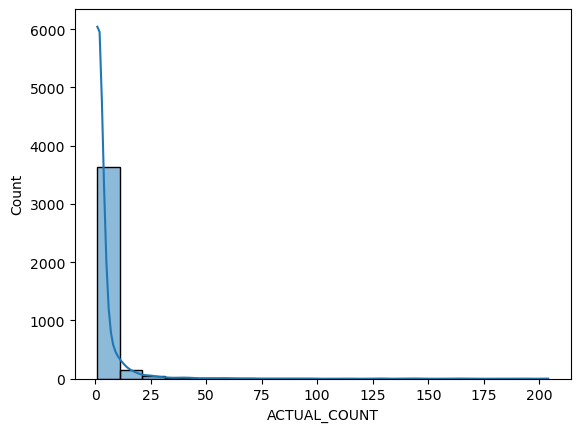

In [25]:
# shwos extreme values for ACTUAL_COUNT
sns.histplot(dfsub['ACTUAL_COUNT'], bins=20, kde = True) 

In [32]:
# Check how many extreme values

dfsub[dfsub['ACTUAL_COUNT'] >100]

,DATA_YEAR,AGENCY_TYPE_NAME,STATE_NAME,HUMAN_TRAFFICKING,OFFENSE_SUBCAT_NAME,ACTUAL_COUNT
182,2015,City,Nevada,1,Commercial Sex Acts,204
341,2016,County,Louisiana,1,Commercial Sex Acts,114
409,2016,City,Nevada,1,Commercial Sex Acts,128
1036,2018,City,Nevada,1,Commercial Sex Acts,193
1489,2019,City,Nevada,1,Commercial Sex Acts,162
1613,2019,City,Texas,1,Commercial Sex Acts,137
2066,2020,City,Nevada,1,Commercial Sex Acts,147
2223,2020,City,Texas,1,Commercial Sex Acts,144
2740,2021,City,Nevada,1,Commercial Sex Acts,165
2921,2021,City,Texas,1,Commercial Sex Acts,128


## 04. Plotting a Choropleth

In [37]:
# Create a data frame with just the states and the values for trafficking incidents

data_plot = dfsub[['STATE_NAME','ACTUAL_COUNT']]
data_plot.head()

,STATE_NAME,ACTUAL_COUNT
0,Missouri,6
1,Ohio,1
2,Ohio,1
3,Tennessee,1
4,Tennessee,3


In [35]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth map
folium.Choropleth(
    geo_data = country_geo, 
    data = data_plot,
    columns = ['STATE_NAME', 'ACTUAL_COUNT'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

In [38]:
# Save the map as HTML file
map.save('human_traffic_map.html')

In [39]:
# Create a data frame with just the states and the values for trafficking incidents

data_plot2 = dfsub[['STATE_NAME','HUMAN_TRAFFICKING','ACTUAL_COUNT']]
data_plot2.head()

,STATE_NAME,HUMAN_TRAFFICKING,ACTUAL_COUNT
0,Missouri,1,6
1,Ohio,1,1
2,Ohio,1,1
3,Tennessee,1,1
4,Tennessee,1,3


In [40]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth map
folium.Choropleth(
    geo_data = country_geo, 
    data = data_plot2,
    columns = ['STATE_NAME', 'HUMAN_TRAFFICKING','ACTUAL_COUNT'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

In [41]:
# Save the map as HTML file
map.save('human_traffic_map2.html')